In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
import os 
working_directory =os.getcwd()
path = working_directory + "/Top 100 most Streamed - Sheet1.csv"
spotify = pd.read_csv(path)

'''from google.colab import drive
drive.mount('/content/drive')
spotify=pd.read_csv('./drive/MyDrive/Top 100 most Streamed - Sheet1.csv')
'''

LIMPIEZA Y EXPLORACIÓN DE LOS DATOS

In [39]:
"""
Datos básicos (cantidad de entradas, cantidad de columnas, nombre de las columnas, valores nulos y
tipo de dato)
"""
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             100 non-null    object
 1   artist            100 non-null    object
 2   top genre         100 non-null    object
 3   year              100 non-null    int64 
 4   beats.per.minute  100 non-null    int64 
 5   energy            100 non-null    int64 
 6   danceability      100 non-null    int64 
 7   loudness.dB       100 non-null    int64 
 8   liveness          100 non-null    int64 
 9   valance           100 non-null    int64 
 10  length            100 non-null    int64 
 11  acousticness      100 non-null    int64 
 12  speechiness       100 non-null    int64 
 13  popularity        100 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 11.1+ KB


In [40]:
#cuántos datos son únicos por cada columna
def relative_unique(df, col):
    print(f"{col}: {100 *  spotify[col].nunique() / len(spotify):.1f}%")

In [41]:
for col in spotify.columns:
    relative_unique(spotify, col)

title: 100.0%
artist: 64.0%
top genre: 34.0%
year: 14.0%
beats.per.minute: 56.0%
energy: 50.0%
danceability: 46.0%
loudness.dB: 10.0%
liveness: 32.0%
valance: 58.0%
length: 67.0%
acousticness: 50.0%
speechiness: 31.0%
popularity: 22.0%


In [42]:
#Verificar si hay datos duplicados
spotify.duplicated().any()

False

In [43]:
"""
Descripción estadistica de los datos numéricos ( total registros, promedio, desviación estandar, 
dato mínimo, percentil 25%, percentil 50%, percentil 75% y dato máximo)
"""
spotify.describe()

,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,2015.960000,116.970000,62.680000,66.96000,-6.100000,16.860000,49.970000,214.530000,24.95000,9.930000,79.670000
std,5.327497,27.470629,16.491737,13.60401,1.987334,12.972403,21.737857,35.934974,26.27876,9.424077,5.905065
min,1975.000000,71.000000,11.000000,35.00000,-14.000000,3.000000,6.000000,119.000000,0.00000,2.000000,53.000000
25%,2015.000000,95.000000,52.000000,59.00000,-7.000000,10.000000,33.750000,190.500000,4.00000,4.000000,79.000000
50%,2017.000000,115.000000,64.500000,69.00000,-6.000000,12.000000,48.000000,210.000000,13.00000,6.000000,81.000000
75%,2018.000000,135.250000,76.000000,77.00000,-5.000000,17.250000,66.000000,234.250000,41.50000,11.000000,83.000000
max,2021.000000,186.000000,92.000000,91.00000,-3.000000,79.000000,93.000000,354.000000,98.00000,46.000000,91.000000


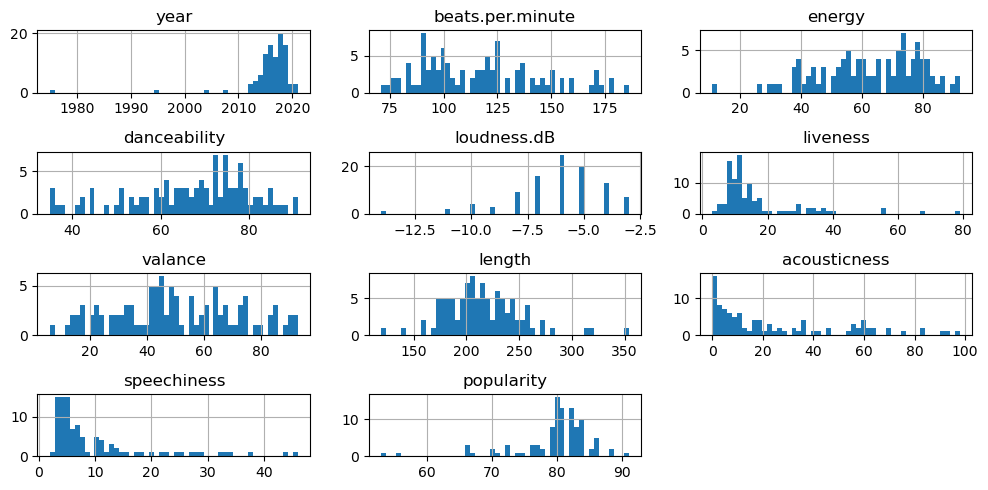

In [44]:
#Distribución de los datos
spotify.hist(figsize= (10,5),bins=50)
plt.tight_layout()
plt.show()

C:\Users\Adri\AppData\Local\Temp\ipykernel_24564\1032676582.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=spotify.corr()


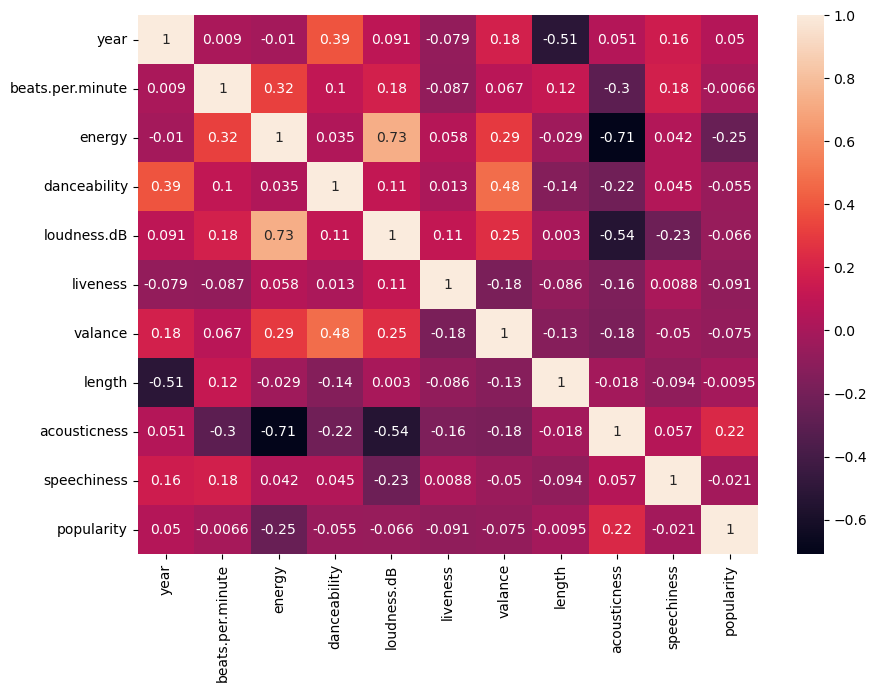

In [45]:
#Relación entre cada columna del data set. Correlación.
corr=spotify.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True)
plt.show()

In [46]:
#Organizar el nombre de las columnas
spotify.columns = (
    spotify.columns
        .str.split(' \(')
        .str[0]
        .str.lower()
        .str.replace(' ', '_')
        .str.replace(".","_"))

C:\Users\Adri\AppData\Local\Temp\ipykernel_24564\2356358861.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  .str.replace(".","_"))


In [47]:
#Explorar los datos
spotify.head()

,title,artist,top_genre,year,beats_per_minute,energy,danceability,loudness_db,liveness,valance,length,acousticness,speechiness,popularity
0,Blinding Lights,The Weeknd,canadian contemporary r&b,2020,171,73,51,-6,9,33,200,0,6,91
1,Watermelon Sugar,Harry Styles,pop,2019,95,82,55,-4,34,56,174,12,5,88
2,Mood (feat. iann dior),24kGoldn,cali rap,2021,91,72,70,-4,32,73,141,17,4,88
3,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,86
4,Perfect,Ed Sheeran,pop,2017,95,45,60,-6,11,17,263,16,2,86


In [48]:
spotify.sample(10)

,title,artist,top_genre,year,beats_per_minute,energy,danceability,loudness_db,liveness,valance,length,acousticness,speechiness,popularity
87,Girls Like You (feat. Cardi B) - Cardi B Version,Maroon 5,pop,2018,125,54,85,-7,13,45,236,57,5,74
9,Memories,Maroon 5,pop,2021,91,33,78,-7,8,60,189,84,6,85
16,Jocelyn Flores,XXXTENTACION,emo rap,2017,134,39,87,-9,30,44,119,47,24,84
7,Circles,Post Malone,dfw rap,2019,120,76,70,-3,9,55,215,19,4,86
32,Something Just Like This,The Chainsmokers,dance pop,2017,103,64,62,-7,16,45,247,5,3,82
80,Stitches,Shawn Mendes,canadian pop,2015,150,75,75,-7,5,75,207,2,7,77
3,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,86
33,Shallow,Lady Gaga,dance pop,2018,96,39,57,-6,23,32,216,37,3,82
4,Perfect,Ed Sheeran,pop,2017,95,45,60,-6,11,17,263,16,2,86
52,when the party's over,Billie Eilish,electropop,2019,83,11,37,-14,9,20,196,98,10,81


In [49]:
spotify.tail()

,title,artist,top_genre,year,beats_per_minute,energy,danceability,loudness_db,liveness,valance,length,acousticness,speechiness,popularity
95,One Dance,Drake,canadian hip hop,2016,104,61,79,-6,32,43,174,1,6,66
96,Sugar,Maroon 5,pop,2015,120,79,75,-7,9,88,235,6,3,66
97,Emotions,Mark Mendy,pop dance,2021,126,83,66,-5,40,74,172,5,29,66
98,Cold Water,Major Lazer,dance pop,2018,93,80,61,-5,16,50,185,7,4,56
99,I Took A Pill In Ibiza - Seeb Remix,Mike Posner,dance pop,2016,102,73,67,-7,9,66,198,3,10,53


In [50]:
#Eliminamos columnas que no usaremos
to_drop = ["liveness"]
spotify.drop(to_drop, inplace=True, axis=1)

In [51]:
spotify

,title,artist,top_genre,year,beats_per_minute,energy,danceability,loudness_db,valance,length,acousticness,speechiness,popularity
0,Blinding Lights,The Weeknd,canadian contemporary r&b,2020,171,73,51,-6,33,200,0,6,91
1,Watermelon Sugar,Harry Styles,pop,2019,95,82,55,-4,56,174,12,5,88
2,Mood (feat. iann dior),24kGoldn,cali rap,2021,91,72,70,-4,73,141,17,4,88
3,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,45,182,75,3,86
4,Perfect,Ed Sheeran,pop,2017,95,45,60,-6,17,263,16,2,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,One Dance,Drake,canadian hip hop,2016,104,61,79,-6,43,174,1,6,66
96,Sugar,Maroon 5,pop,2015,120,79,75,-7,88,235,6,3,66
97,Emotions,Mark Mendy,pop dance,2021,126,83,66,-5,74,172,5,29,66
98,Cold Water,Major Lazer,dance pop,2018,93,80,61,-5,50,185,7,4,56
